In [22]:
import pandas as pd

# Set the file path
file_path = r"C:\Users\frast\Desktop\Progetti Git\credit card\creditcard.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
import pandas as pd

# Caricamento del dataset (usa il percorso locale o se è già caricato nel notebook)
df = pd.read_csv(r'C:\Users\frast\Desktop\Progetti Git\credit card\creditcard.csv')

# Funzione per determinare il tipo di variabile
def determine_variable_type(series):
    unique_values = series.nunique()
    
    if series.name == 'Class':
        return 'Binary Categorical'
    elif pd.api.types.is_numeric_dtype(series):
        if unique_values == 2:
            return 'Binary Categorical'
        elif unique_values < 10:
            return 'Categorical'
        else:
            return 'Numeric'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    else:
        return 'Text'

# Applicazione al dataset
variable_types = df.apply(determine_variable_type)

# Stampa dei risultati
print("Tipo di variabile per ciascuna colonna:")
print(variable_types)


Tipo di variabile per ciascuna colonna:
Time                 Numeric
V1                   Numeric
V2                   Numeric
V3                   Numeric
V4                   Numeric
V5                   Numeric
V6                   Numeric
V7                   Numeric
V8                   Numeric
V9                   Numeric
V10                  Numeric
V11                  Numeric
V12                  Numeric
V13                  Numeric
V14                  Numeric
V15                  Numeric
V16                  Numeric
V17                  Numeric
V18                  Numeric
V19                  Numeric
V20                  Numeric
V21                  Numeric
V22                  Numeric
V23                  Numeric
V24                  Numeric
V25                  Numeric
V26                  Numeric
V27                  Numeric
V28                  Numeric
Amount               Numeric
Class     Binary Categorical
dtype: object


In [24]:
from sklearn.preprocessing import StandardScaler

# Copia del dataframe
df_transformed = df.copy()

# Standardizzazione di 'Amount' e 'Time'
scaler = StandardScaler()
df_transformed[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[['Amount', 'Time']])

# (Facoltativo) Drop delle colonne originali
df_transformed.drop(['Amount', 'Time'], axis=1, inplace=True)


In [25]:
# Verifica della presenza di missing values
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


Series([], dtype: int64)


In [26]:
# Statistiche descrittive generali
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [27]:
# Distribuzione frodi vs. transazioni legittime
class_counts = df['Class'].value_counts()
print(class_counts)

# Percentuale di frodi
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"Frodi: {fraud_percentage:.5f}%")


Class
0    284315
1       492
Name: count, dtype: int64
Frodi: 0.17275%


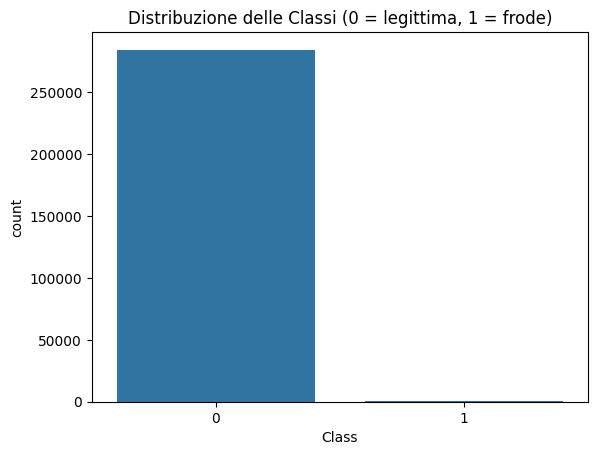

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Istogramma classi
sns.countplot(x='Class', data=df)
plt.title('Distribuzione delle Classi (0 = legittima, 1 = frode)')
plt.show()


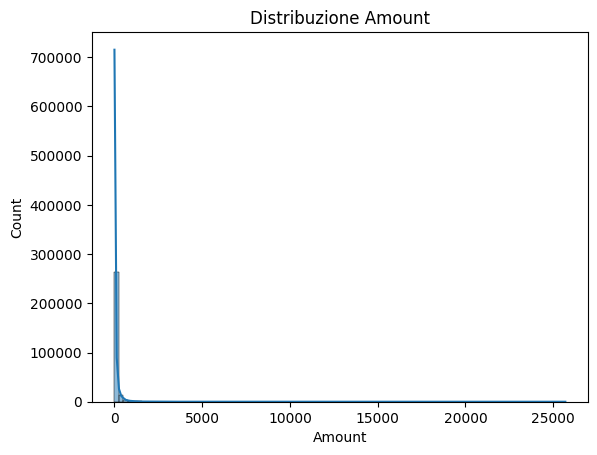

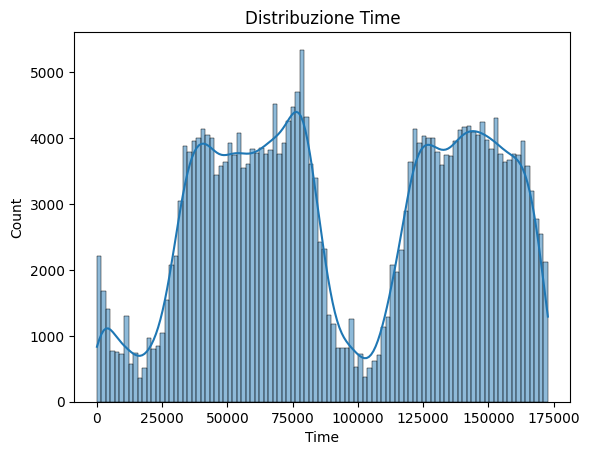

In [29]:
# Amount
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Distribuzione Amount')
plt.show()

# Time
sns.histplot(df['Time'], bins=100, kde=True)
plt.title('Distribuzione Time')
plt.show()


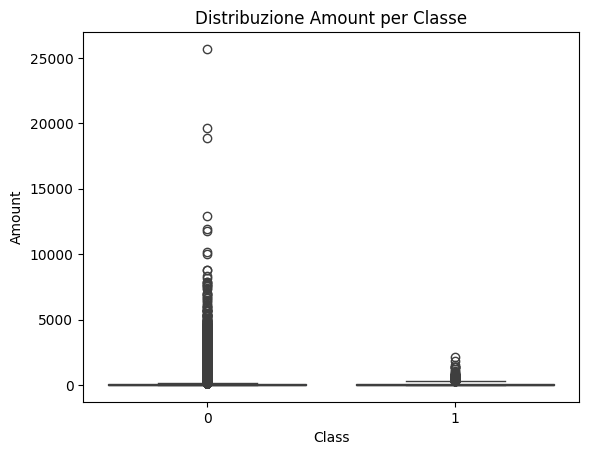

In [30]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribuzione Amount per Classe')
plt.show()


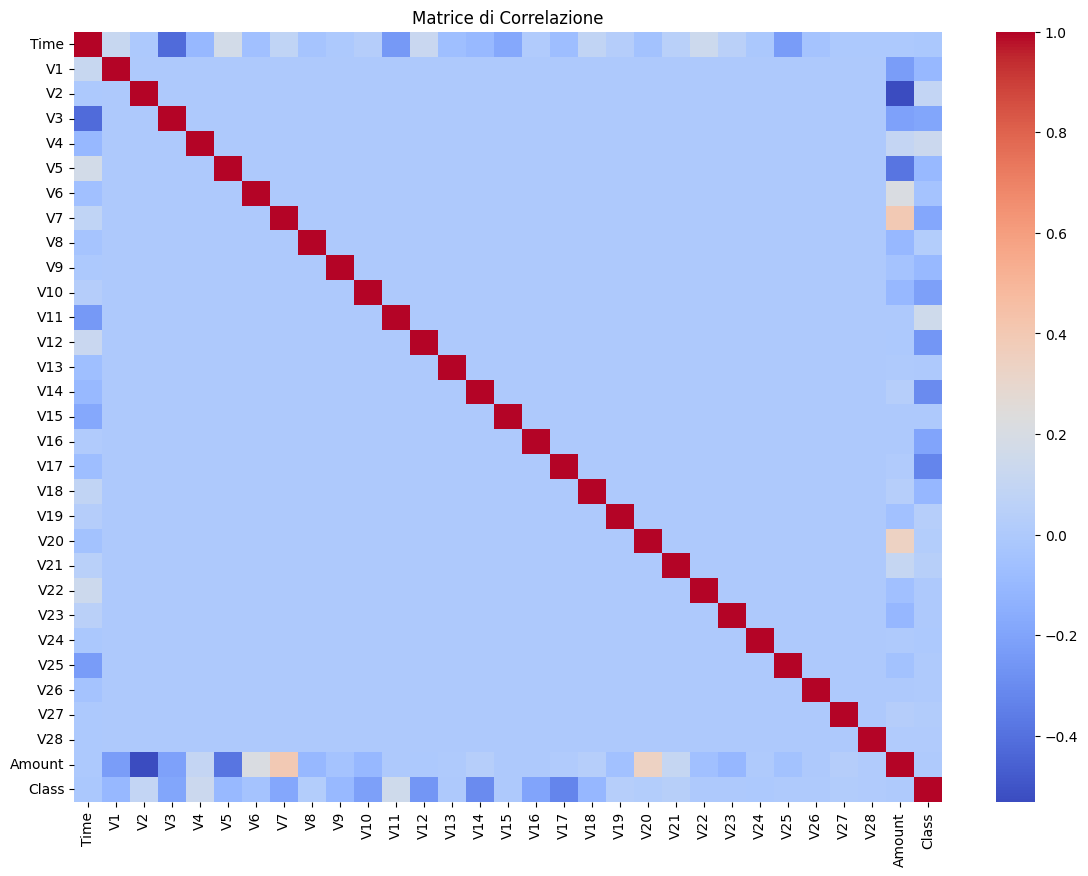

In [31]:
# Calcolo correlazione (subset per velocità)
corr = df.corr()

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()


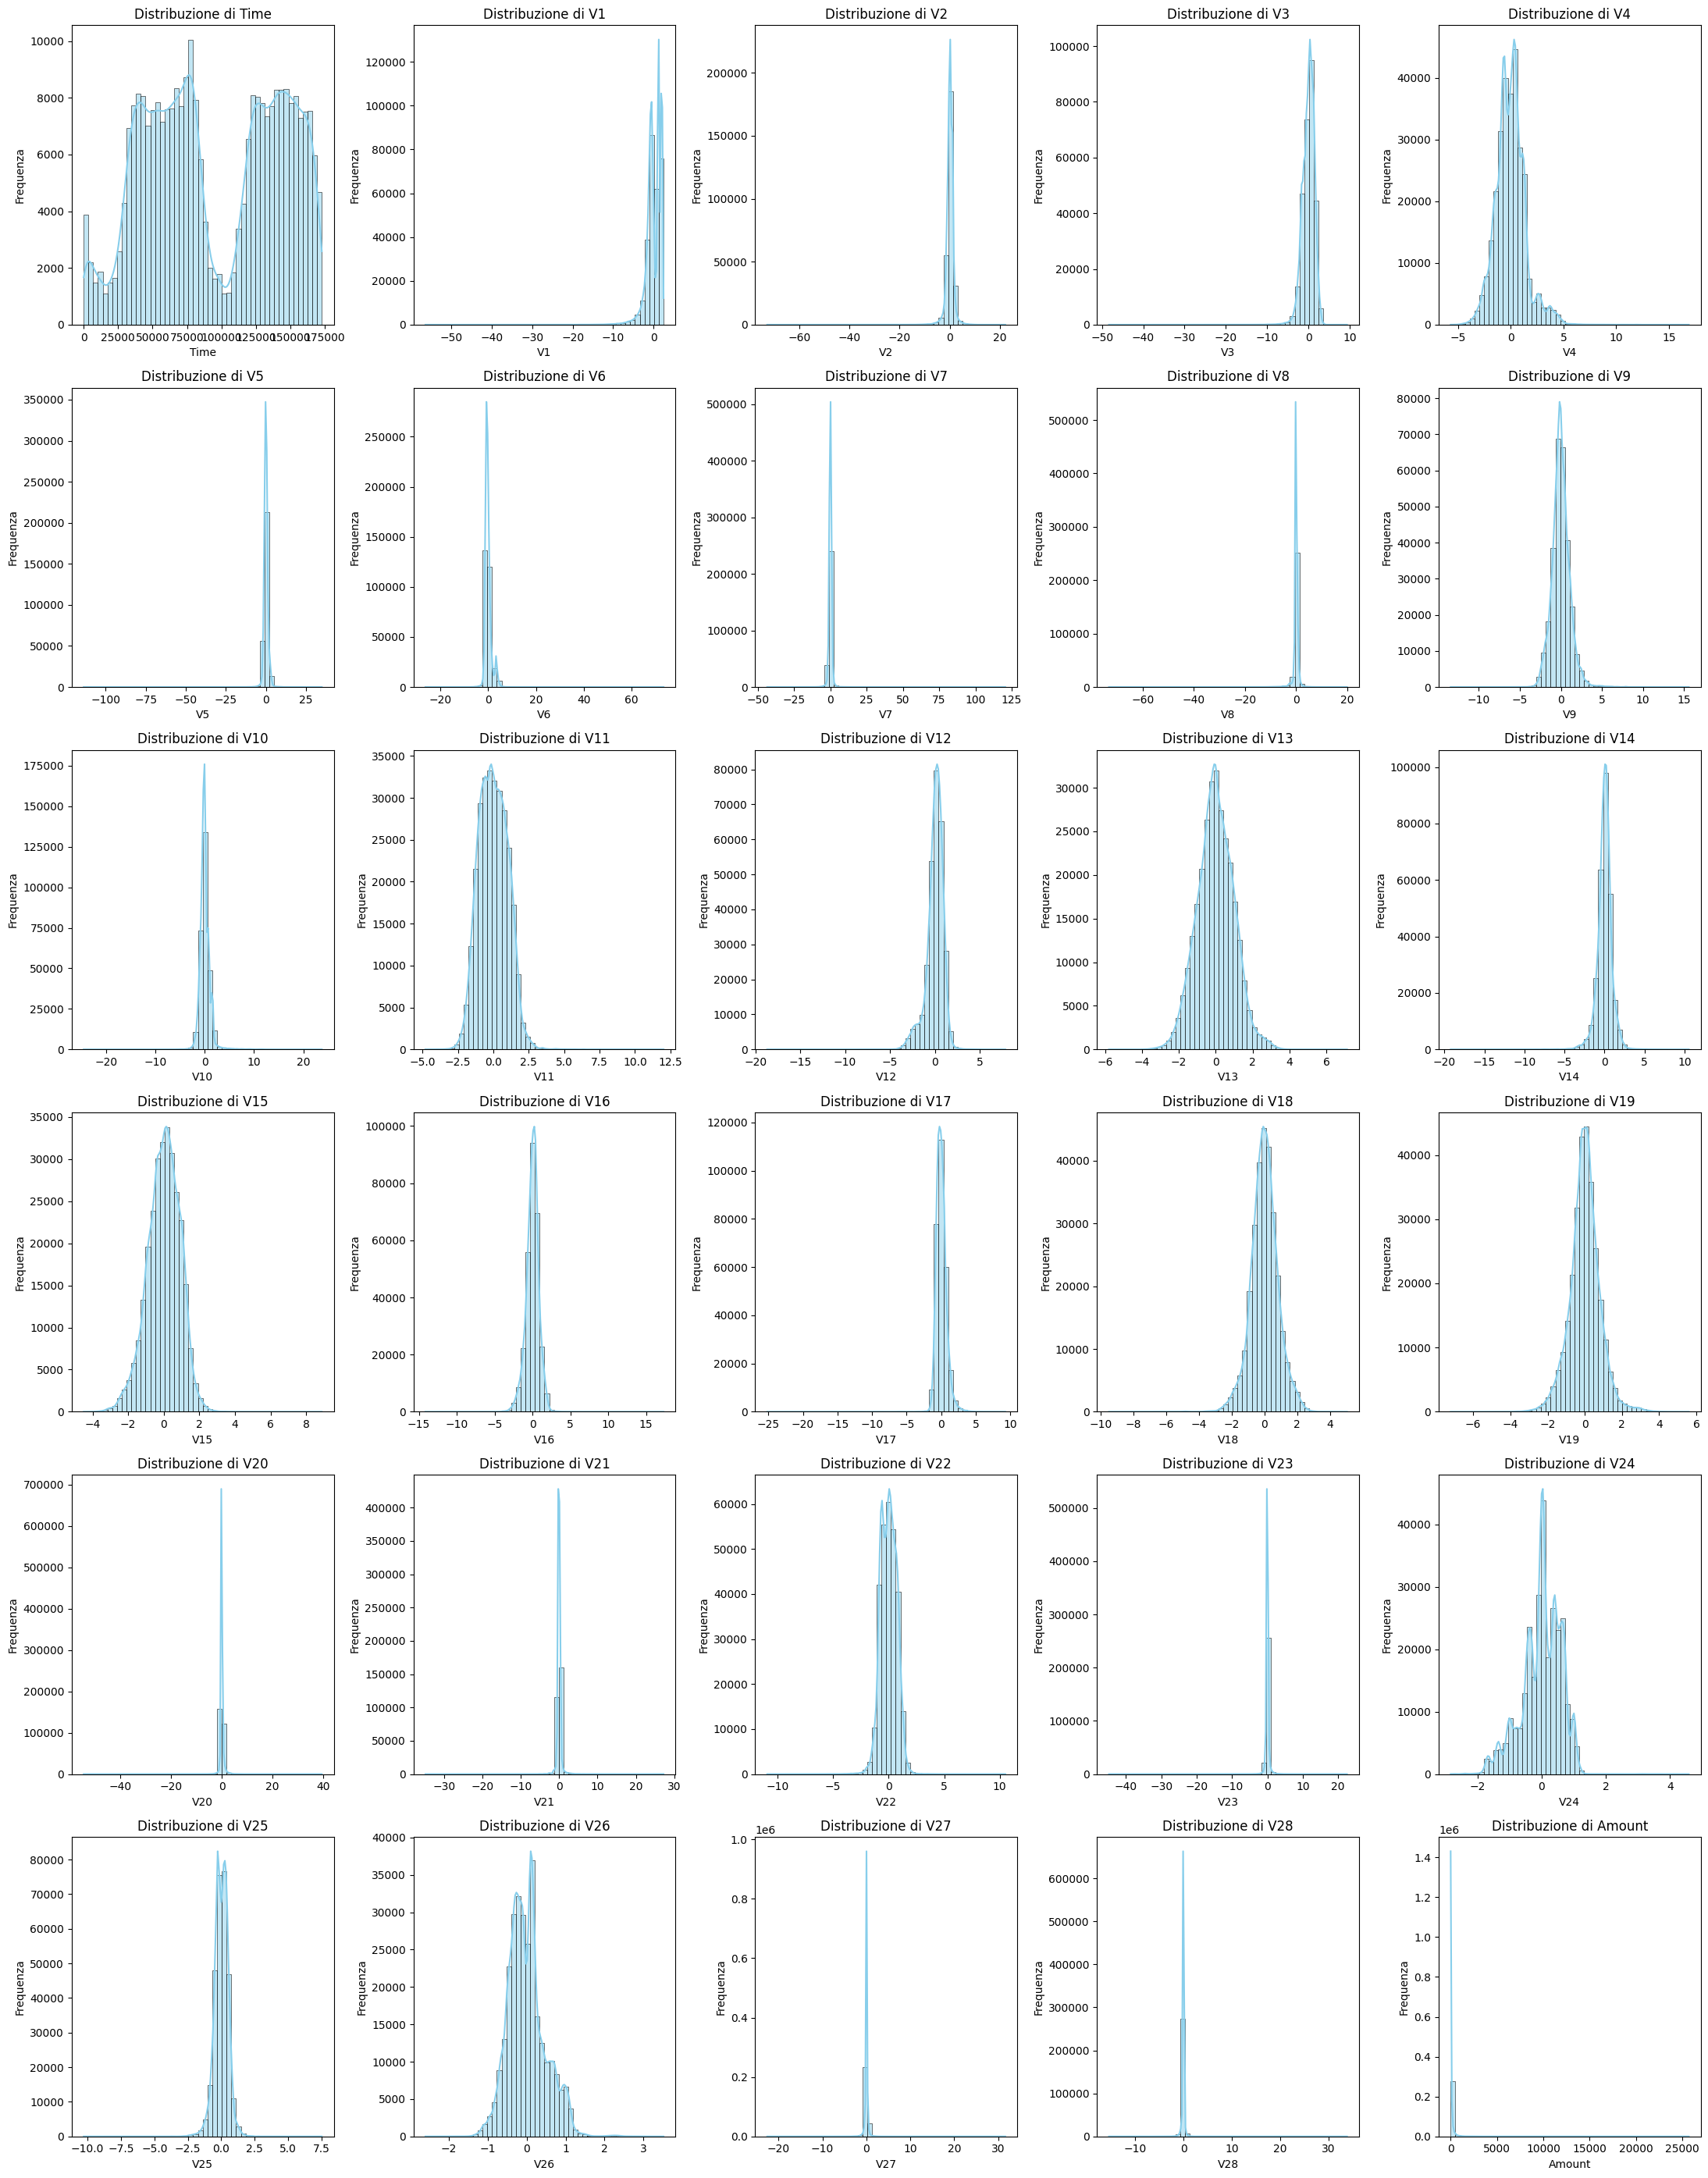

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
file_path = r'C:\Users\frast\Desktop\Progetti Git\credit card\creditcard.csv'
df = pd.read_csv(file_path)

# Selezione delle variabili numeriche (tutte tranne la target)
numerical_vars = df.drop(columns='Class').columns

# Creazione dei grafici
plt.figure(figsize=(22, 28))  # Dimensione più grande

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(6, 5, i)  # 6 righe × 5 colonne = 30 slot
    sns.histplot(df[var], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribuzione di {var}')
    plt.xlabel(var)
    plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()


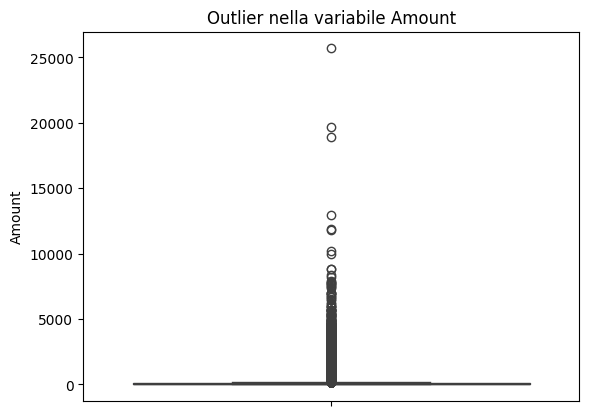

In [33]:
# Boxplot per rilevamento outlier su Amount
sns.boxplot(data=df['Amount'])
plt.title('Outlier nella variabile Amount')
plt.show()


In [34]:
# Calcolo soglia IQR per Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Limiti
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Transazioni sospette
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Outlier in Amount: {len(outliers)} su {len(df)}")


Outlier in Amount: 31904 su 284807


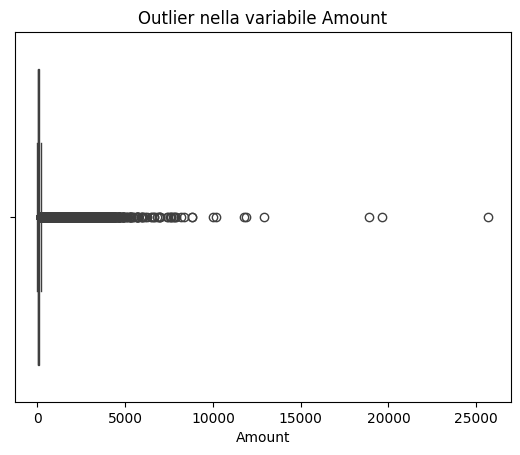

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Amount'])
plt.title('Outlier nella variabile Amount')
plt.show()


In [36]:
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
fraud_outliers = outliers[outliers['Class'] == 1]

print(f"Frodi tra gli outlier: {len(fraud_outliers)}")


Frodi tra gli outlier: 91


In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])


In [38]:
# Controllo tipo
print(df['Amount'].dtype)

# Controllo valori non numerici
non_numeric = df[~df['Amount'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)

# Controllo NaN
print(df['Amount'].isnull().sum())


float64
Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Amount_scaled]
Index: []

[0 rows x 32 columns]
0


In [39]:
# Forza i valori a float e rimuove eventuali non convertibili
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Rimuove eventuali NaN dopo la conversione
df = df.dropna(subset=['Amount'])


In [40]:
# Forza la colonna Amount in float (convertendo errori in NaN)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [41]:
# Rimuove le righe con Amount non valido
df = df.dropna(subset=['Amount'])


In [42]:
# Istogramma sovrapposto invece del KDE
plt.figure(figsize=(12, 6))
sns.histplot(legit['Amount'], bins=50, label='Legittime', color='blue', alpha=0.5)
sns.histplot(fraud['Amount'], bins=50, label='Frodi', color='red', alpha=0.5)
plt.legend()
plt.title('Distribuzione Amount per classe')
plt.show()


NameError: name 'legit' is not defined

<Figure size 1200x600 with 0 Axes>

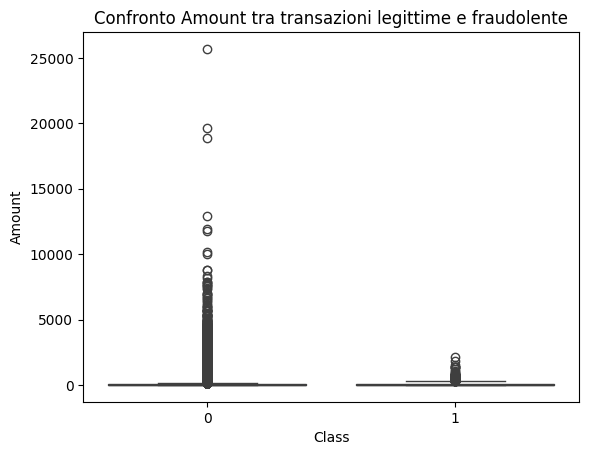

In [43]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Confronto Amount tra transazioni legittime e fraudolente')
plt.show()


In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separazione feature e target
X = df.drop(columns='Class')
y = df['Class']

# Split train/test stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Applicazione SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verifica distribuzione dopo il bilanciamento
from collections import Counter
print(f"Distribuzione prima: {Counter(y_train)}")
print(f"Distribuzione dopo SMOTE: {Counter(y_train_res)}")


Distribuzione prima: Counter({0: 199020, 1: 344})
Distribuzione dopo SMOTE: Counter({0: 199020, 1: 199020})


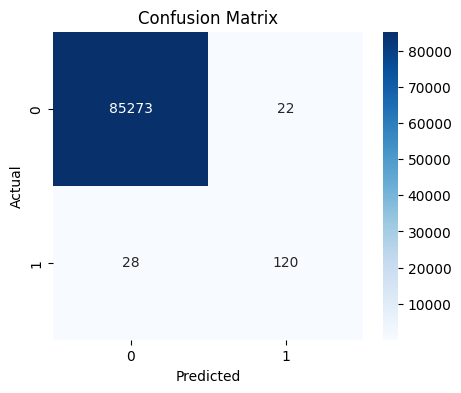

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     85295
           1     0.8451    0.8108    0.8276       148

    accuracy                         0.9994     85443
   macro avg     0.9224    0.9053    0.9136     85443
weighted avg     0.9994    0.9994    0.9994     85443

ROC AUC: 0.9775
PR AUC: 0.8366


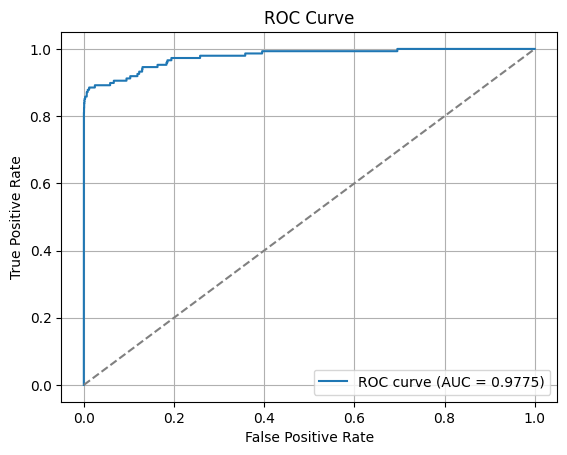

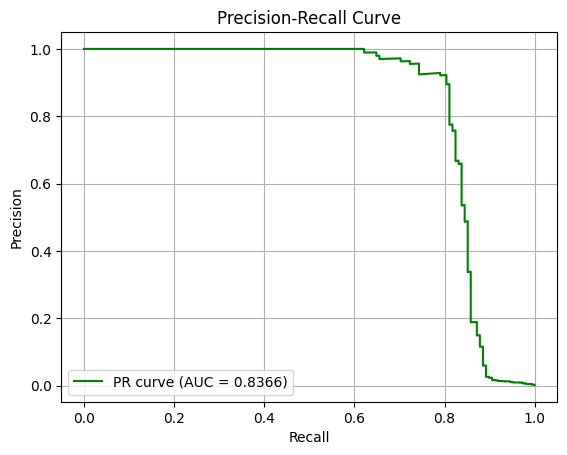

In [45]:
import xgboost as xgb
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_auc_score, precision_recall_curve, roc_curve,
                             auc)
import matplotlib.pyplot as plt
import seaborn as sns

# Modello XGBoost
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,  # già bilanciato con SMOTE
    random_state=42
)

# Addestramento
model.fit(X_train_res, y_train_res)

# Predizione sul test set (NON bilanciato)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 1. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Report dettagliato
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 3. ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# 4. PR AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# 6. Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.4f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


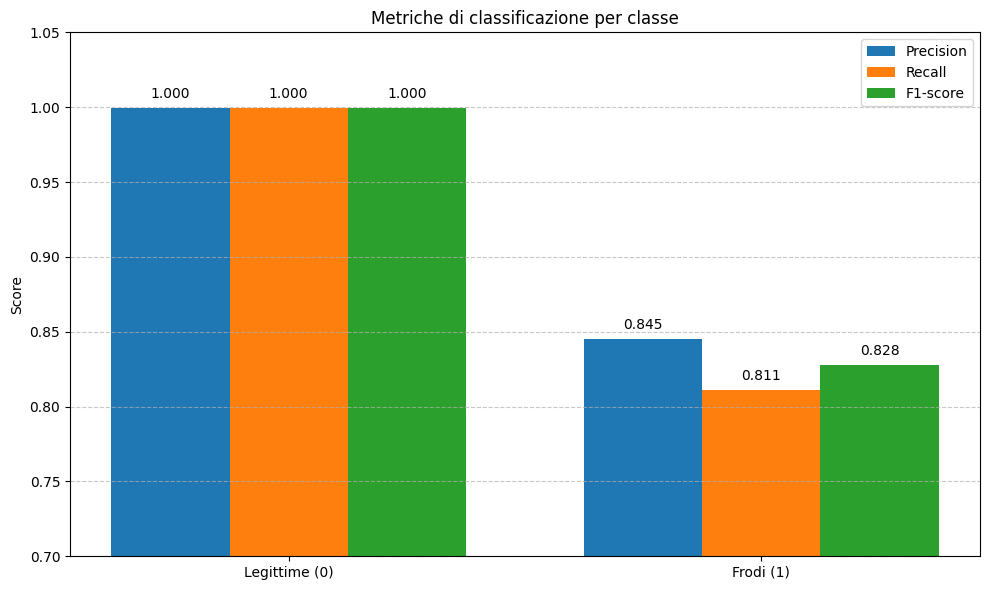

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Metriche manuali dal classification_report
labels = ['Legittime (0)', 'Frodi (1)']
precision = [0.9997, 0.8451]
recall = [0.9997, 0.8108]
f1 = [0.9997, 0.8276]

x = np.arange(len(labels))  # posizione etichette
width = 0.25

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

# Dettagli
ax.set_ylabel('Score')
ax.set_title('Metriche di classificazione per classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.7, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotazioni
for rect in rects1 + rects2 + rects3:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


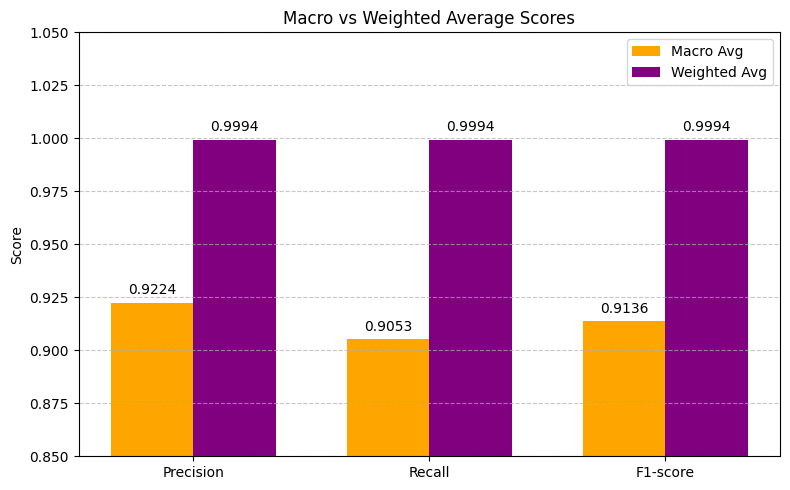

In [47]:
import matplotlib.pyplot as plt

# Valori presi dal classification report
metrics = ['Precision', 'Recall', 'F1-score']
macro_avg = [0.9224, 0.9053, 0.9136]
weighted_avg = [0.9994, 0.9994, 0.9994]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, macro_avg, width, label='Macro Avg', color='orange')
rects2 = ax.bar(x + width/2, weighted_avg, width, label='Weighted Avg', color='purple')

ax.set_ylabel('Score')
ax.set_title('Macro vs Weighted Average Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.85, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotazioni
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\frast\AppData\Local\Temp\ipykernel_3192\1579782051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx][:top_n], y=features[sorted_idx][:top_n], palette='viridis')


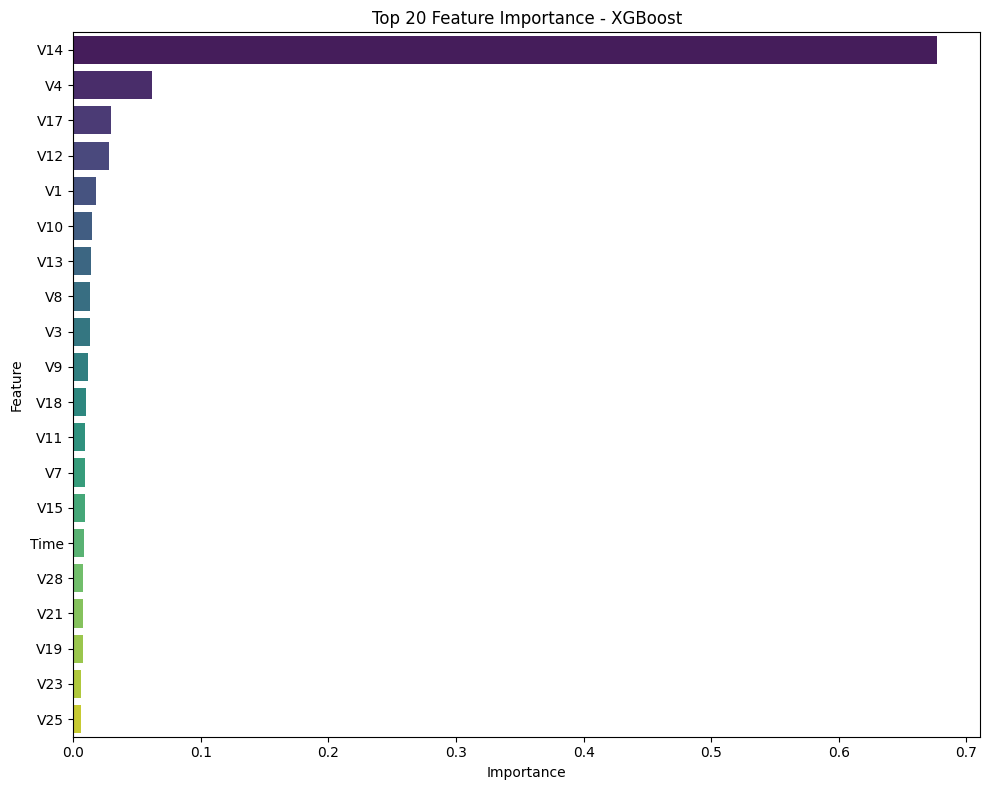

In [48]:
# Visualizzazione delle feature importance da XGBoost
importances = model.feature_importances_
features = X_train.columns

# Ordina per importanza
sorted_idx = importances.argsort()[::-1]
top_n = 20  # le prime 20

plt.figure(figsize=(10, 8))
sns.barplot(x=importances[sorted_idx][:top_n], y=features[sorted_idx][:top_n], palette='viridis')
plt.title("Top 20 Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [49]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


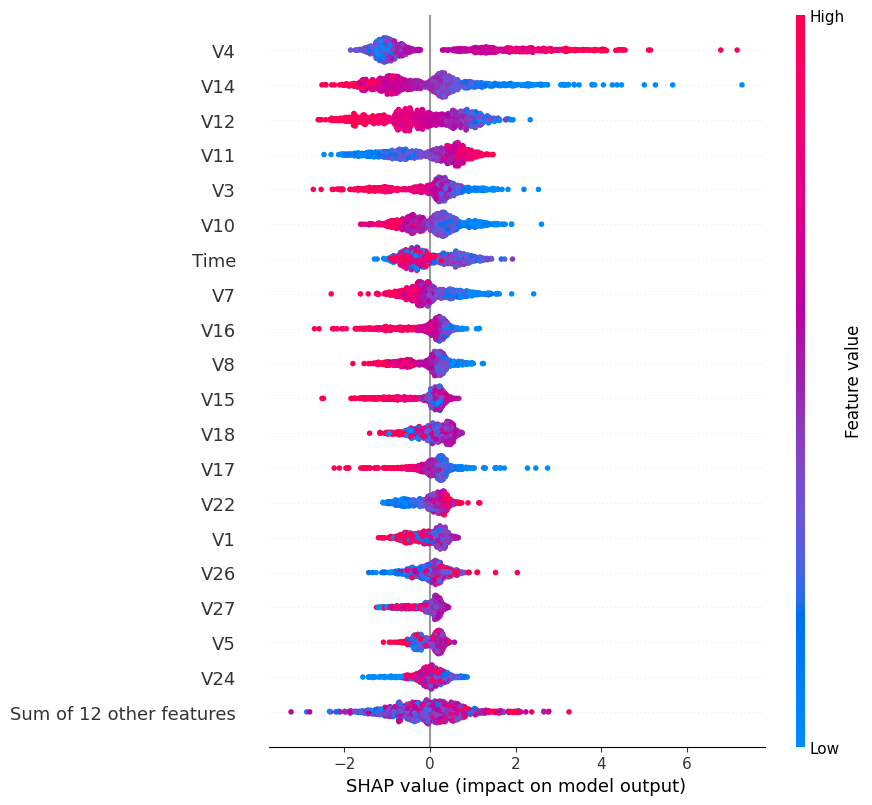

In [50]:
import shap

# SHAP per XGBoost - usa il TreeExplainer (ottimizzato per alberi)
explainer = shap.Explainer(model, X_train)

# Calcola i valori SHAP su un campione
sample = X_test.sample(1000, random_state=42)
shap_values = explainer(sample)

# Beeswarm plot (impatti individuali)
shap.plots.beeswarm(shap_values, max_display=20)


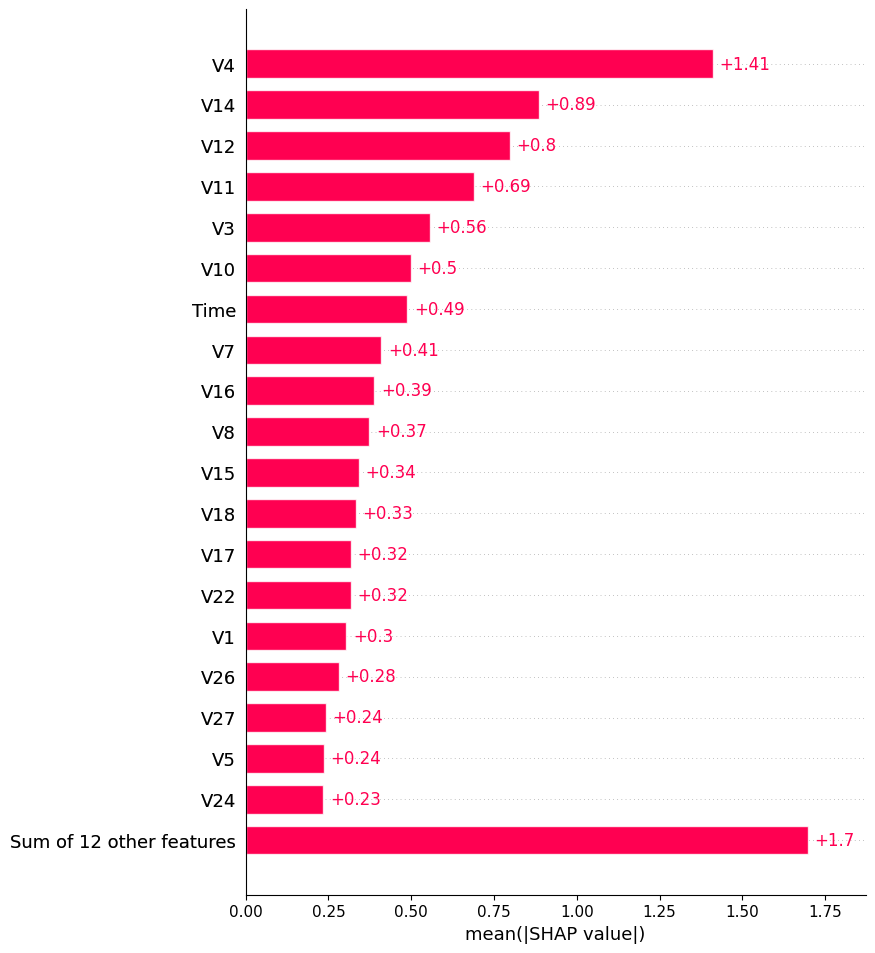

In [51]:
# Barplot delle feature più importanti in media
shap.plots.bar(shap_values, max_display=20)


In [52]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Modello base
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,  # già bilanciato con SMOTE
    random_state=42,
    n_jobs=-1
)

# Griglia di parametri
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}

# GridSearch con validazione incrociata stratificata
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',  # oppure 'roc_auc', 'precision', ecc.
    cv=3,
    verbose=1
)

# Esecuzione
grid_search.fit(X_train_res, y_train_res)

# Migliori parametri
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best F1-score: 0.9998367268450344


In [53]:
# Migliori parametri trovati
print("Best parameters:", grid_search.best_params_)
print(f"Best F1-score (mean CV): {grid_search.best_score_:.4f}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best F1-score (mean CV): 0.9998


In [54]:
import pandas as pd

# Tutti i risultati in un DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Seleziona e ordina le colonne più utili
cols = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
display(results_df[cols].sort_values('rank_test_score'))


,params,mean_test_score,std_test_score,rank_test_score
17,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.999837,0.000019,1
15,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999814,0.000020,2
11,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.999812,0.000022,3
16,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.999809,0.000035,4
9,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999726,0.000062,5
14,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999714,0.000043,6
10,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.999671,0.000040,7
13,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.999503,0.000115,8
8,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.998614,0.000157,9
12,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.997722,0.000088,10


In [55]:
import time

# Modello ottimizzato
best_model = grid_search.best_estimator_

# Tempo di predizione
start = time.time()
_ = best_model.predict(X_test)
end = time.time()

print(f"Tempo di inferenza su {len(X_test)} osservazioni: {end - start:.4f} secondi")


Tempo di inferenza su 85443 osservazioni: 0.0853 secondi


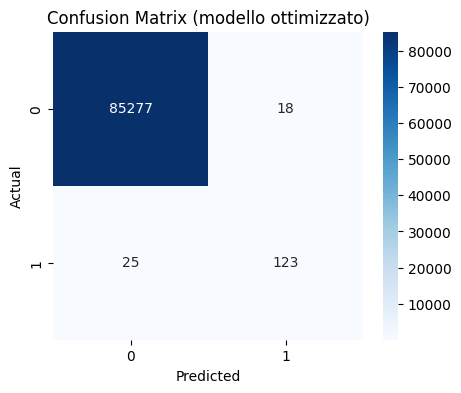

Classification Report (modello ottimizzato):
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     85295
           1     0.8723    0.8311    0.8512       148

    accuracy                         0.9995     85443
   macro avg     0.9360    0.9154    0.9255     85443
weighted avg     0.9995    0.9995    0.9995     85443

ROC AUC: 0.9817
PR AUC: 0.8476


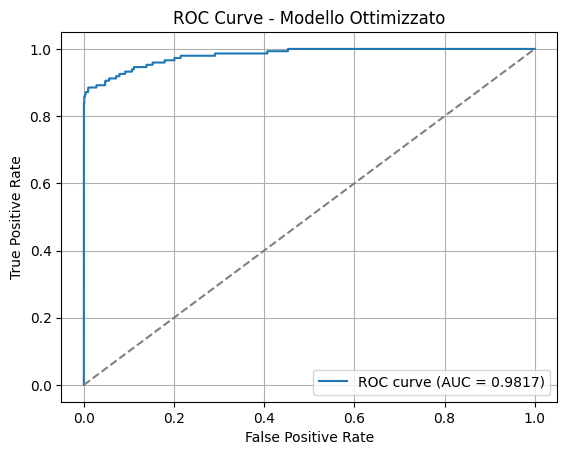

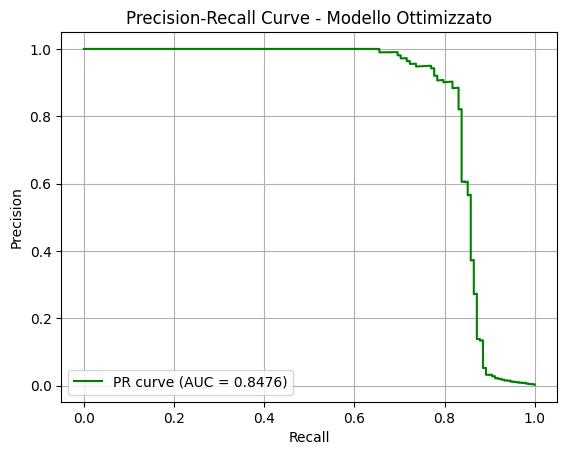

In [56]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predizioni
y_pred_opt = best_model.predict(X_test)
y_proba_opt = best_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix (modello ottimizzato)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Report
print("Classification Report (modello ottimizzato):")
print(classification_report(y_test, y_pred_opt, digits=4))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba_opt)
print(f"ROC AUC: {roc_auc:.4f}")

# PR AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba_opt)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_opt)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Modello Ottimizzato")
plt.legend()
plt.grid()
plt.show()

# PR curve
plt.figure()
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.4f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Modello Ottimizzato")
plt.legend()
plt.grid()
plt.show()


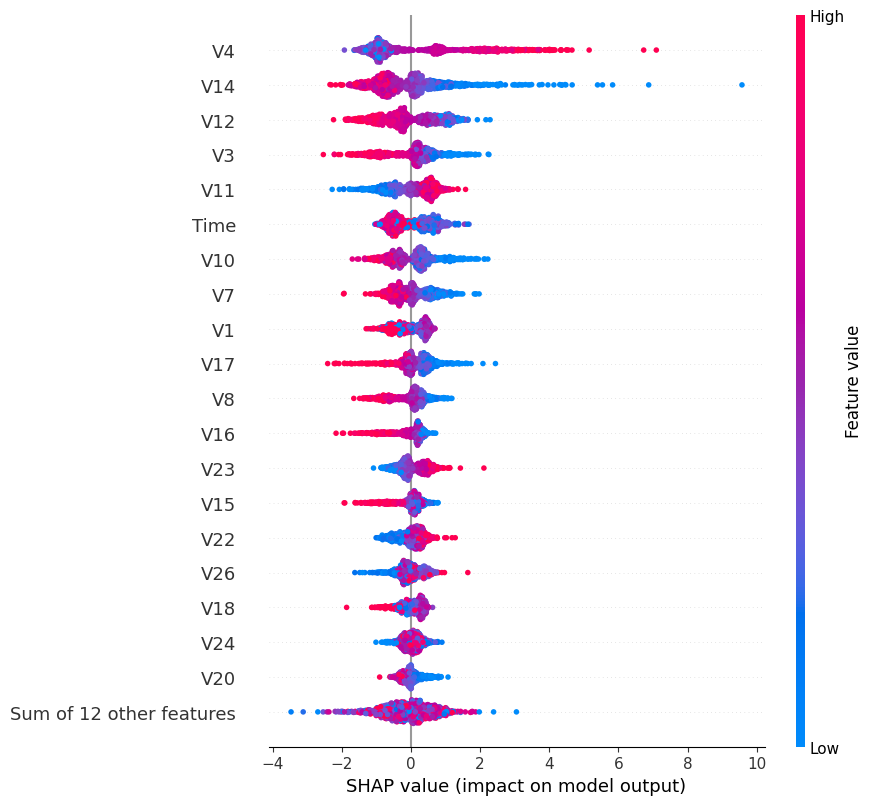

In [57]:
import shap

# Calcola SHAP values sul modello ottimizzato
explainer = shap.Explainer(best_model, X_train)

# Esegui su un campione (altrimenti è troppo lento)
sample = X_test.sample(1000, random_state=42)
shap_values = explainer(sample)

# Beeswarm: impatto globale delle feature (per singola predizione)
shap.plots.beeswarm(shap_values, max_display=20)


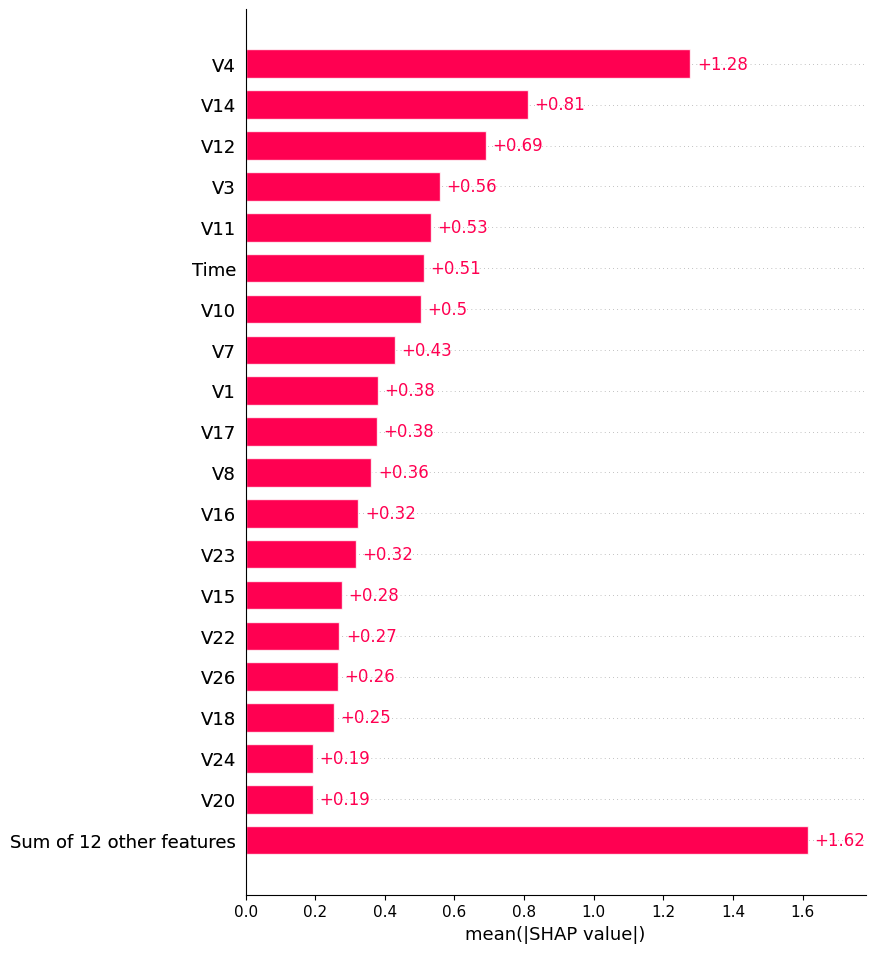

In [58]:
shap.plots.bar(shap_values, max_display=20)


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Istanzia il modello
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

# Addestramento sul dataset bilanciato (SMOTE)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1,
                       random_state=42)

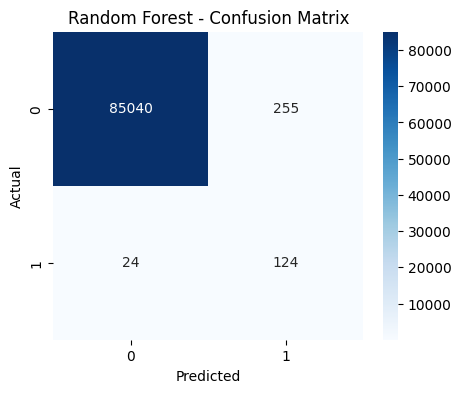

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0     0.9997    0.9970    0.9984     85295
           1     0.3272    0.8378    0.4706       148

    accuracy                         0.9967     85443
   macro avg     0.6634    0.9174    0.7345     85443
weighted avg     0.9986    0.9967    0.9974     85443

ROC AUC: 0.9779
PR AUC: 0.6935


In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predizione sul test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Classification report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# ROC AUC e PR AUC
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Output testuale
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=4))
print(f"ROC AUC: {roc_auc_rf:.4f}")
print(f"PR AUC: {pr_auc_rf:.4f}")


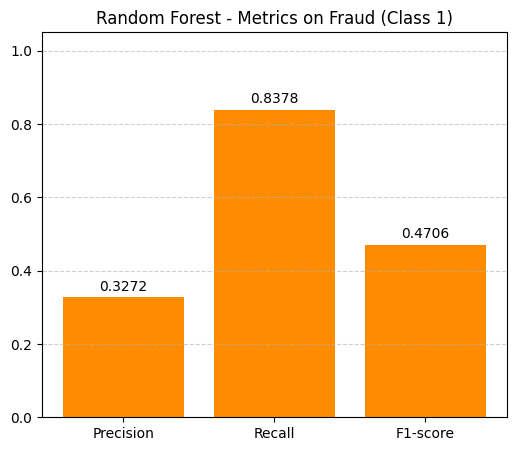

In [61]:
# Estrai metriche per classe 1 (frodi)
precision = report_rf['1']['precision']
recall = report_rf['1']['recall']
f1 = report_rf['1']['f1-score']

# Barplot con etichette
import numpy as np

labels = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color='darkorange')
plt.ylim(0, 1.05)
plt.title("Random Forest - Metrics on Fraud (Class 1)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


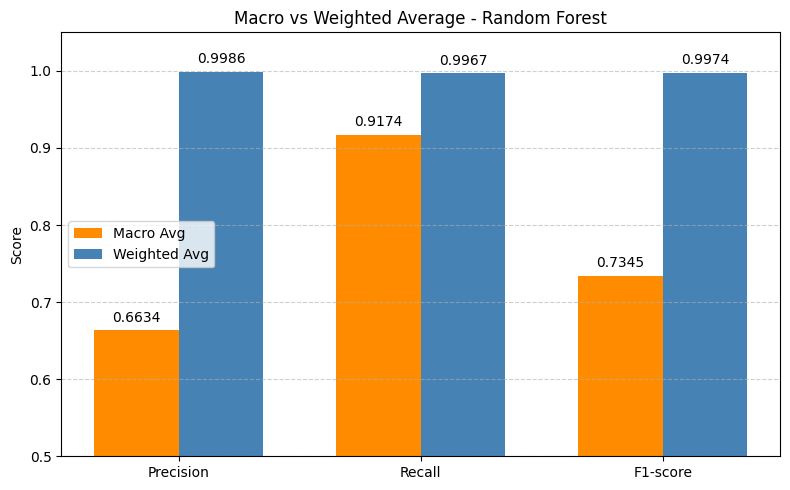

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai valori da classification_report
macro_precision = report_rf['macro avg']['precision']
macro_recall = report_rf['macro avg']['recall']
macro_f1 = report_rf['macro avg']['f1-score']

weighted_precision = report_rf['weighted avg']['precision']
weighted_recall = report_rf['weighted avg']['recall']
weighted_f1 = report_rf['weighted avg']['f1-score']

# Labels e dati
labels = ['Precision', 'Recall', 'F1-score']
macro_values = [macro_precision, macro_recall, macro_f1]
weighted_values = [weighted_precision, weighted_recall, weighted_f1]

x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, macro_values, width, label='Macro Avg', color='darkorange')
bars2 = ax.bar(x + width/2, weighted_values, width, label='Weighted Avg', color='steelblue')

# Dettagli grafici
ax.set_ylabel('Score')
ax.set_title('Macro vs Weighted Average - Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.5, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Etichette sopra le barre
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


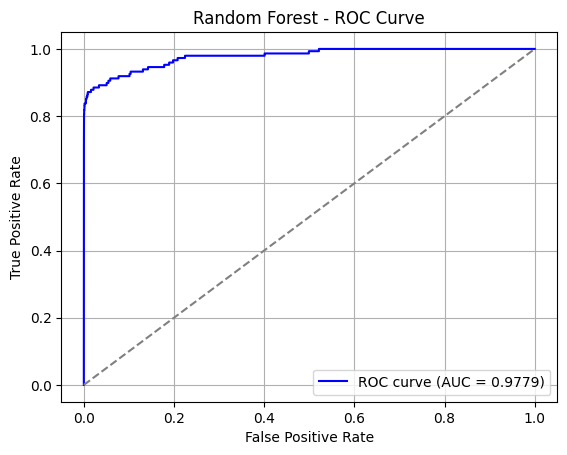

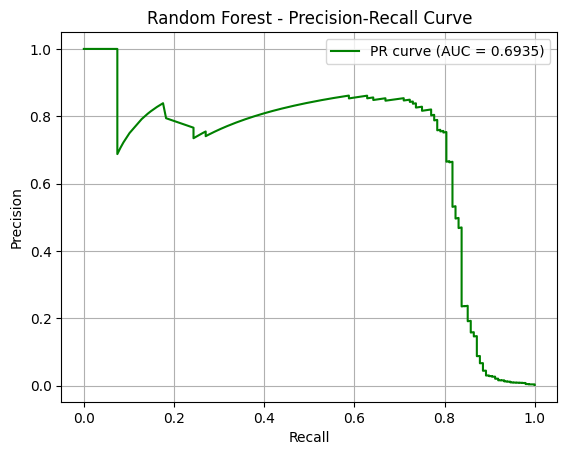

In [63]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (AUC = {roc_auc_rf:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
plt.figure()
plt.plot(recall_rf, precision_rf, label=f"PR curve (AUC = {pr_auc_rf:.4f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Random Forest - Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [64]:
from sklearn.linear_model import LogisticRegression

# Modello logistic regression (con C=1.0 default)
lr_model = LogisticRegression(
    solver='liblinear',  # adatto a dataset piccoli/medi
    random_state=42
)

# Training sul set bilanciato (SMOTE)
lr_model.fit(X_train_res, y_train_res)


LogisticRegression(random_state=42, solver='liblinear')

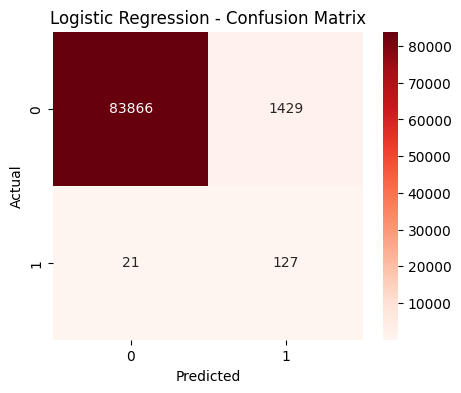

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0     0.9997    0.9832    0.9914     85295
           1     0.0816    0.8581    0.1491       148

    accuracy                         0.9830     85443
   macro avg     0.5407    0.9207    0.5702     85443
weighted avg     0.9982    0.9830    0.9900     85443

ROC AUC: 0.9523
PR AUC: 0.6829


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, auc

# Predizioni
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Report
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# ROC AUC e PR AUC
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Report completo
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, digits=4))
print(f"ROC AUC: {roc_auc_lr:.4f}")
print(f"PR AUC: {pr_auc_lr:.4f}")


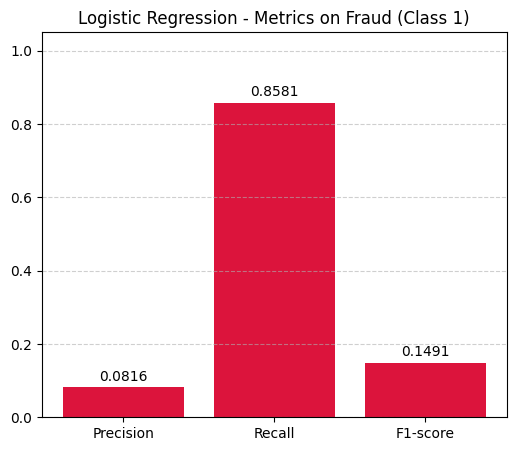

In [66]:
# Metriche classe 1
precision = report_lr['1']['precision']
recall = report_lr['1']['recall']
f1 = report_lr['1']['f1-score']

labels = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color='crimson')
plt.ylim(0, 1.05)
plt.title("Logistic Regression - Metrics on Fraud (Class 1)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


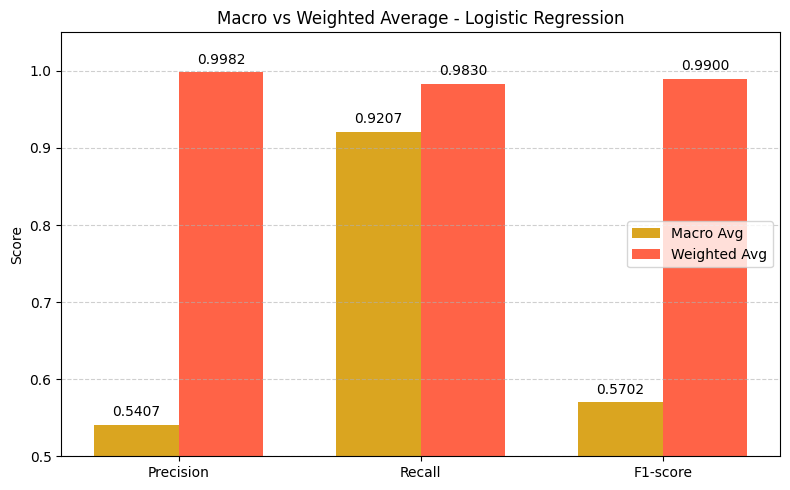

In [67]:
# Macro e weighted avg
macro = report_lr['macro avg']
weighted = report_lr['weighted avg']

labels = ['Precision', 'Recall', 'F1-score']
macro_vals = [macro['precision'], macro['recall'], macro['f1-score']]
weighted_vals = [weighted['precision'], weighted['recall'], weighted['f1-score']]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, macro_vals, width, label='Macro Avg', color='goldenrod')
bars2 = ax.bar(x + width/2, weighted_vals, width, label='Weighted Avg', color='tomato')

ax.set_ylabel('Score')
ax.set_title('Macro vs Weighted Average - Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.5, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Etichette
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 4), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


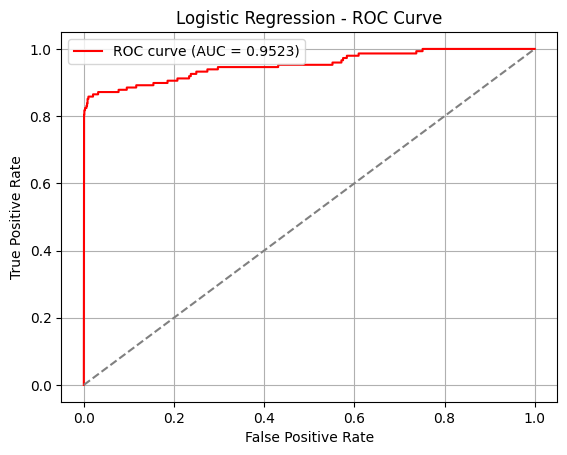

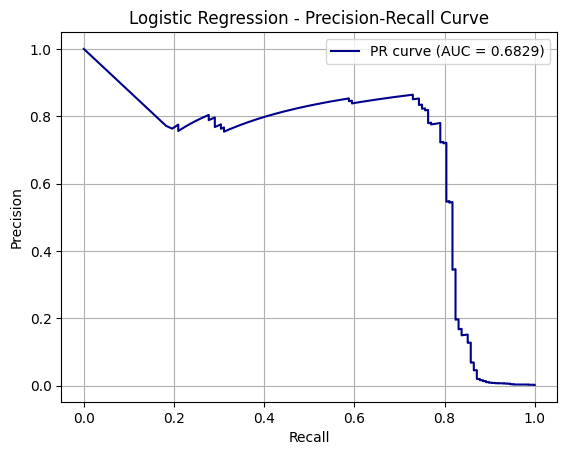

In [68]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"ROC curve (AUC = {roc_auc_lr:.4f})", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.grid()
plt.show()

# PR Curve
plt.figure()
plt.plot(recall_lr, precision_lr, label=f"PR curve (AUC = {pr_auc_lr:.4f})", color='darkblue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic Regression - Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [72]:
results = {
    'precision': {
        'XGBoost': 0.8723,
        'Random Forest': 0.3272,
        'Logistic Regression': 0.0816
    },
    'recall': {
        'XGBoost': 0.8311,
        'Random Forest': 0.8378,
        'Logistic Regression': 0.8581
    },
    'f1': {
        'XGBoost': 0.8512,
        'Random Forest': 0.4706,
        'Logistic Regression': 0.1491
    },
    'roc_auc': {
        'XGBoost': 0.9817,
        'Random Forest': 0.9779,
        'Logistic Regression': 0.9523
    },
    'pr_auc': {
        'XGBoost': 0.8476,
        'Random Forest': 0.6935,
        'Logistic Regression': 0.6829
    }
}


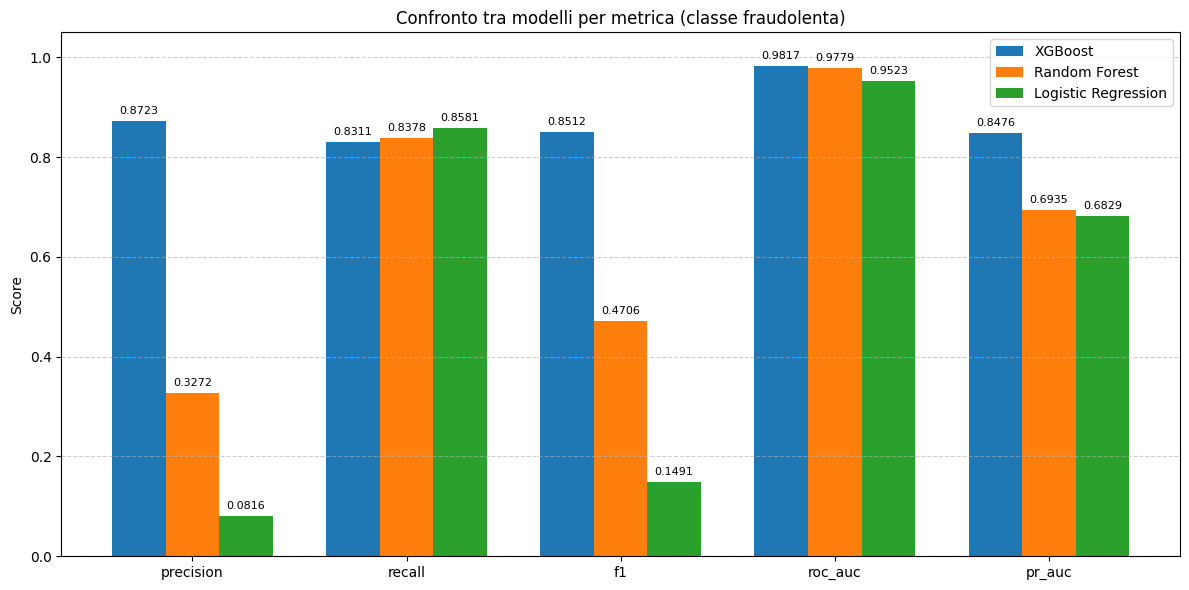

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Liste ordinate per plotting
metrics = list(results.keys())
models = list(results['precision'].keys())
num_metrics = len(metrics)
num_models = len(models)

# Setup dati per ogni metrica
values = [[results[metric][model] for model in models] for metric in metrics]

x = np.arange(num_metrics)  # posizione delle metriche
width = 0.25

# Plot
plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    bar = plt.bar(x + i*width - width,  # posizione centrata
                  [results[metric][model] for metric in metrics],
                  width, label=model)
    # Annotazioni
    for j, val in enumerate([results[metric][model] for metric in metrics]):
        plt.text(x[j] + i*width - width, val + 0.01, f'{val:.4f}', ha='center', va='bottom', fontsize=8)

# Etichette e griglia
plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Confronto tra modelli per metrica (classe fraudolenta)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
